In [1]:
java_code_smells = read.csv("java_code_smells.csv", header = TRUE)
kotlin_code_smells = read.csv("kotlin_code_smells.csv", header = TRUE)

In [2]:
set.seed(37)
df_java_projects_ran <- java_code_smells[sample(nrow(java_code_smells)),]
df_kotlin_projects_ran <- kotlin_code_smells[sample(nrow(kotlin_code_smells)),]

Dividing into training and test data.

In [3]:
df_java_projects_training <- df_java_projects_ran[1:400,]
df_kotlin_projects_training <- df_kotlin_projects_ran[1:400,]

In [4]:
rownames(df_java_projects_training) <- NULL
rownames(df_kotlin_projects_training) <- NULL

In [5]:
df_java_projects_training

Project,LF,LPL,TMM,Total,Lifespan,Issues,LOC,Commits,Contributors,Stargazers
changmingxie/tcc-transaction,3,102,15,120,1086,159,7259,173,8,2775
Tencent/VasSonic,1,67,16,84,481,2,9987,365,19,8824
kbastani/spring-cloud-microservice-example,0,0,1,1,1285,21,1229,51,9,2504
siacs/Conversations,7,390,92,489,1766,331,54505,5483,140,3069
siyamed/android-shape-imageview,0,51,3,54,1547,52,2795,82,5,2286
android-cjj/Android-MaterialRefreshLayout,0,19,9,28,1173,75,3342,90,7,2079
rubensousa/RecyclerViewSnap,0,10,1,11,816,2,873,87,4,3788
checkstyle/checkstyle,618,542,381,1541,1912,486,239801,9961,232,4037
springside/springside4,0,92,47,139,2467,71,17902,1076,29,5479
dbeaver/dbeaver,81,3114,334,3529,1131,755,368544,10821,86,6674


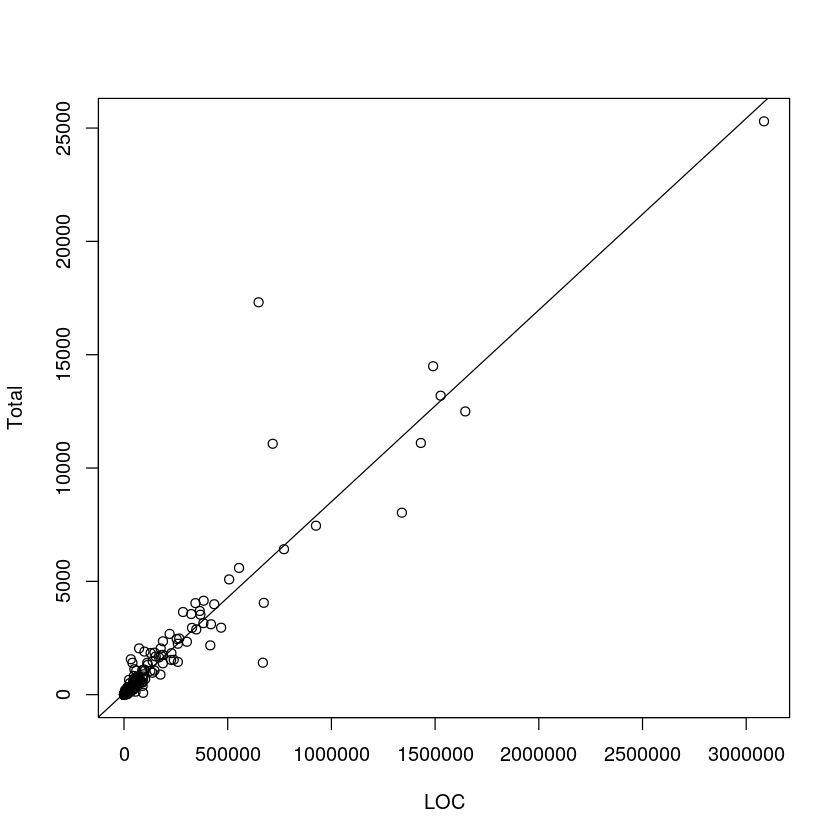

In [6]:
fit <- lm(Total ~ LOC, data=df_java_projects_training)
plot(df_java_projects_training$LOC,df_java_projects_training$Total,
xlab="LOC",
ylab="Total")
abline(fit)

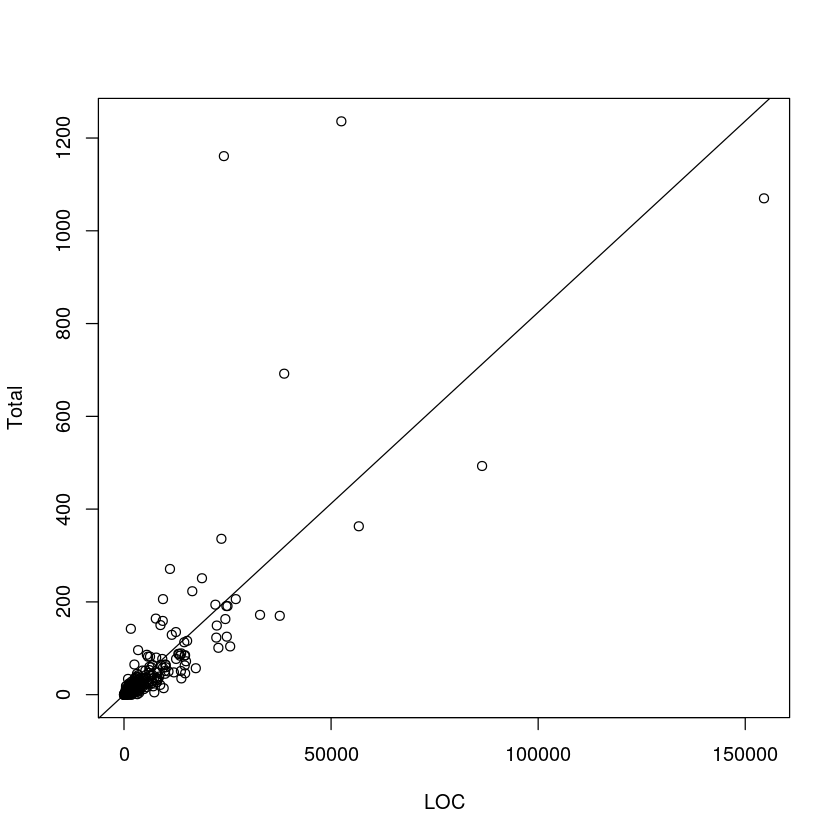

In [7]:
fit <- lm(Total ~ LOC, data=df_kotlin_projects_training)
plot(df_kotlin_projects_training$LOC,df_kotlin_projects_training$Total,
xlab="LOC",
ylab="Total")
abline(fit)

In [8]:
short_java_projects <- subset(df_java_projects_training, LOC < 5000)

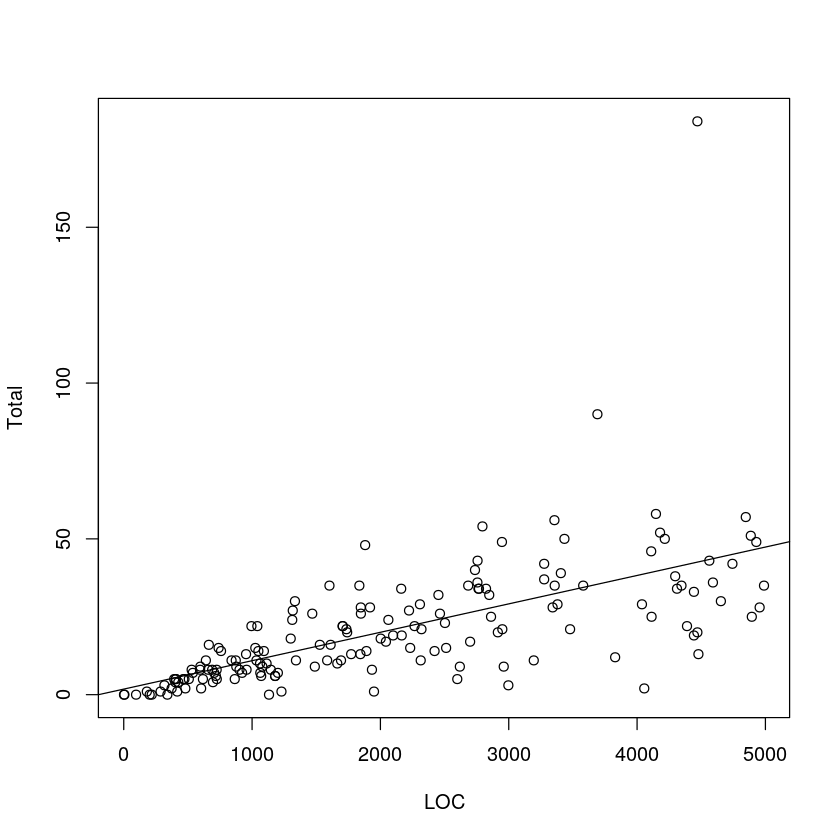

In [9]:
fit <- lm(Total ~ LOC, data=short_java_projects)
plot(short_java_projects$LOC,short_java_projects$Total,
xlab="LOC",
ylab="Total")
abline(fit)

In [10]:
short_kotlin_projects <- subset(df_kotlin_projects_training, LOC < 5000)

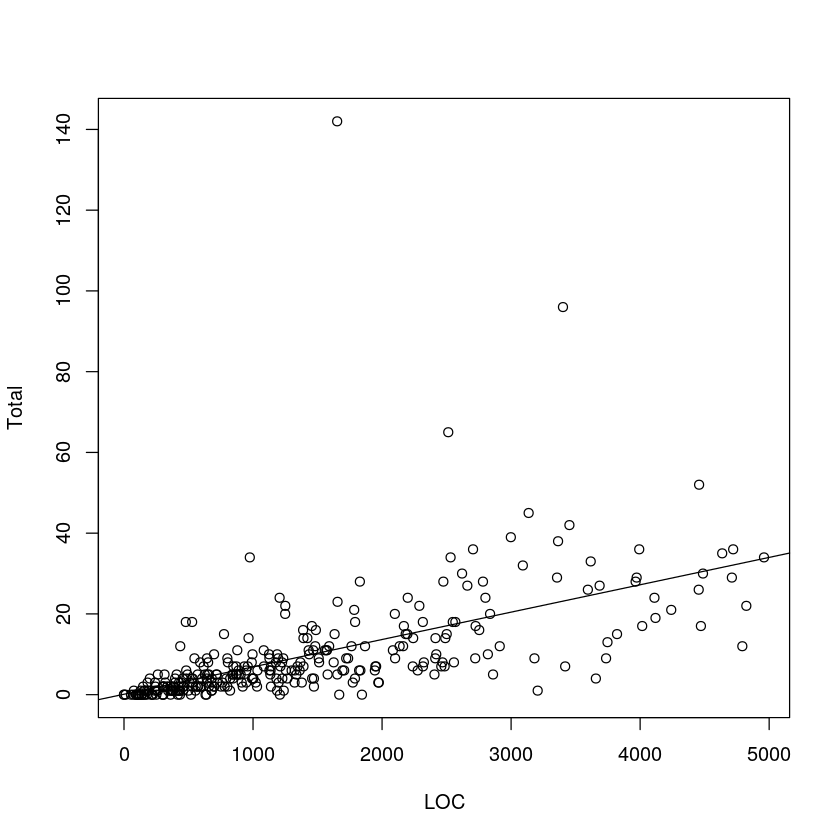

In [11]:
fit <- lm(Total ~ LOC, data=short_kotlin_projects)
plot(short_kotlin_projects$LOC,short_kotlin_projects$Total,
xlab="LOC",
ylab="Total")
abline(fit)

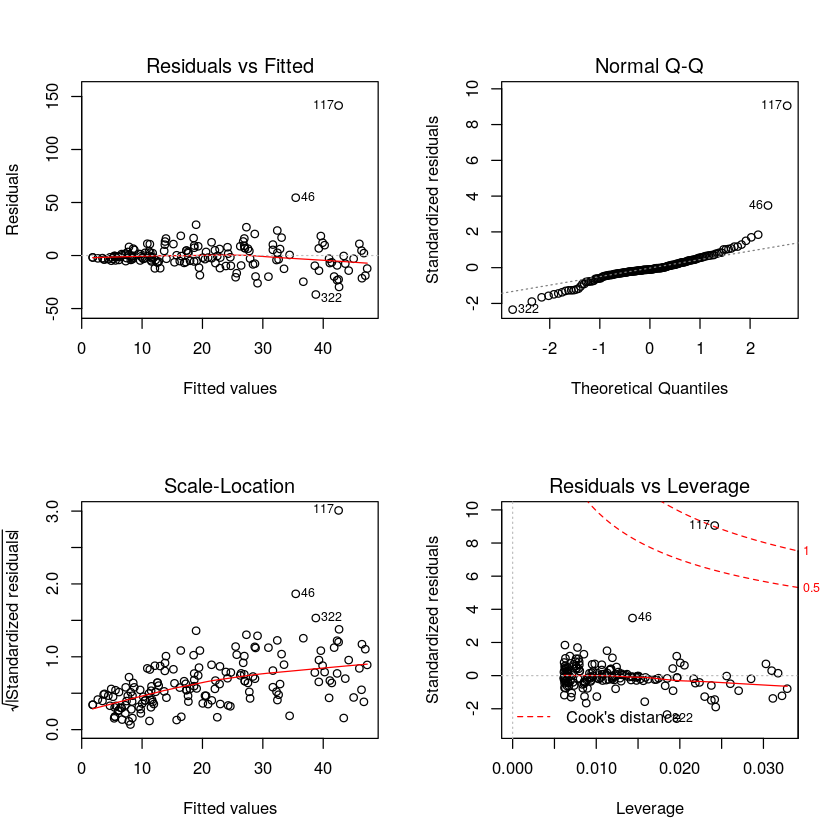

In [12]:
fit <- lm(Total ~ LOC, data=short_java_projects)
par(mfrow=c(2,2))
plot(fit)

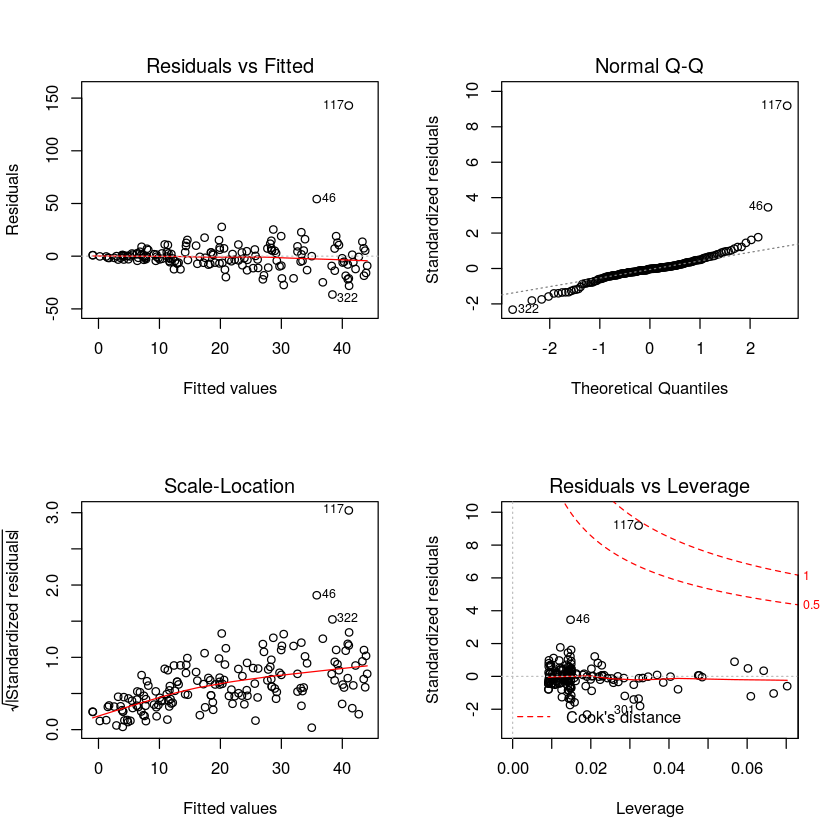

In [13]:
polynomial_fit <- lm(Total ~ LOC + I(LOC^2), data=short_java_projects)
par(mfrow=c(2,2))
plot(polynomial_fit)

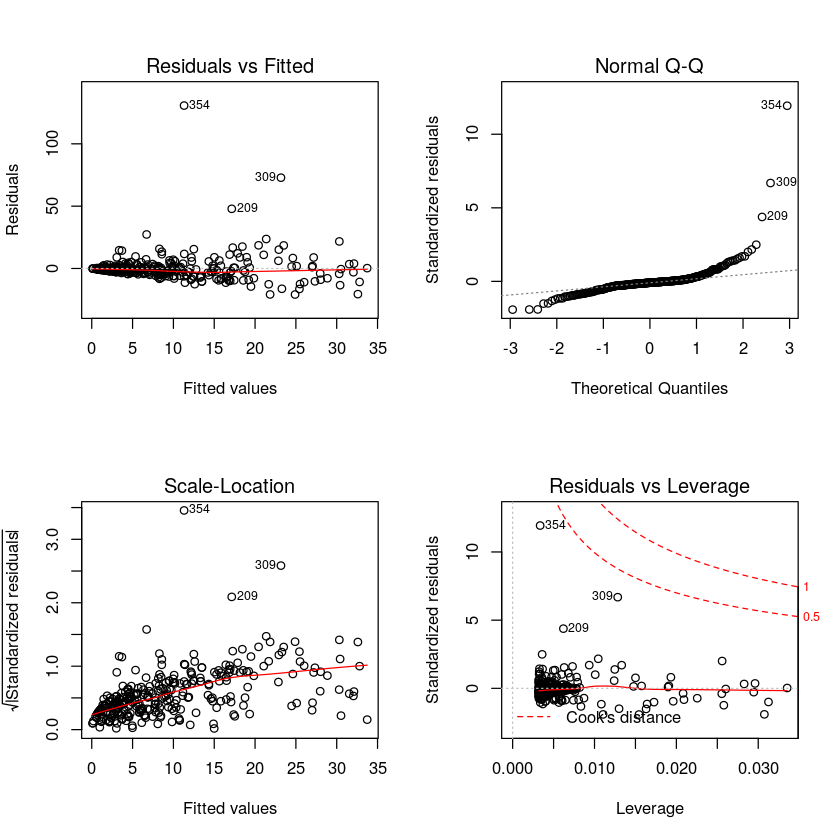

In [14]:
fit <- lm(Total ~ LOC, data=short_kotlin_projects)
par(mfrow=c(2,2))
plot(fit)

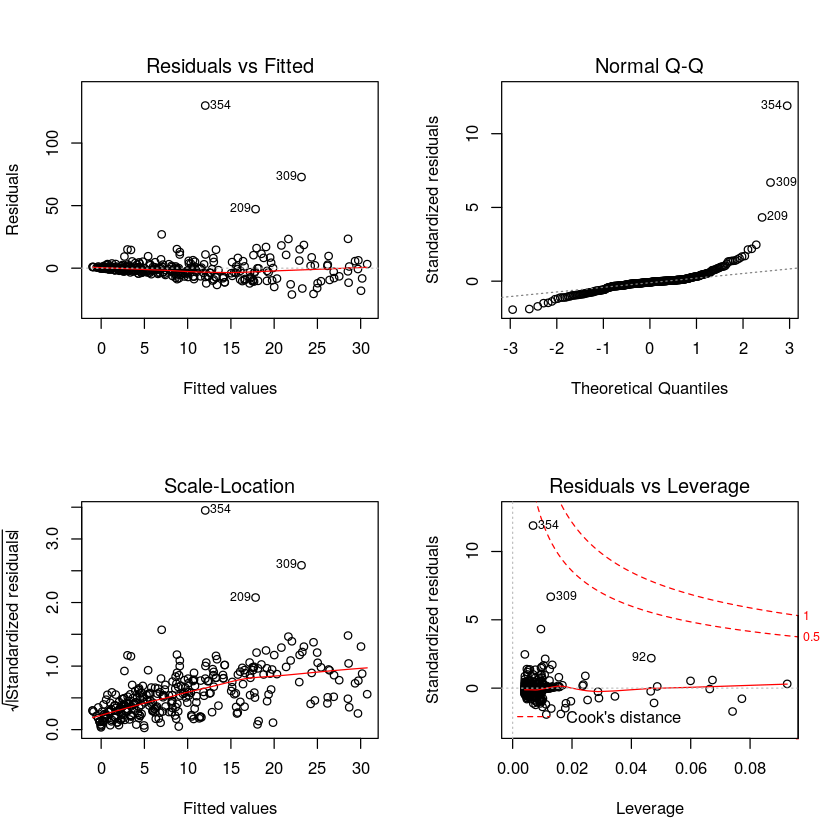

In [15]:
polynomial_fit <- lm(Total ~ LOC + I(LOC^2), data=short_kotlin_projects)
par(mfrow=c(2,2))
plot(polynomial_fit)